

## Import Libraries






# Task 2 - Data Science With Python
#### Credit / Home Loans - AutoML vs Bespoke ML


`Standard Bank` plans to leverage cutting-edge technologies to provide their clients with a full range of services through the comfort of their mobile devices as it embraces the wave of digital transformation. The bank, which is Africa's largest lender by assets, wants to enhance the present procedure for house loan applications. Home loan applications must currently be processed manually by loan officials. A decision on whether or not to give the applicant the loan for the required amount will be communicated to them after this procedure, which takes 2 to 3 days. By implementing a model that predicts whether a potential borrower will default on his or her loan or not, Standard Bank wants to use machine learning to evaluate an applicant's credit worthiness and streamline the process so that the applicant hears back right away after submitting their application.

To achieve the goal, we must adhere to the data science lifecycle. The following is a list of the phases of the data science lifecycle(https://www.datascience-pm.com/crisp-dm-2/):

                    ♦ Business Understanding
                    ♦ Data Understanding
                    ♦ Data Preparation
                    ♦ Modelling
                    ♦ Evaluation
                    ♦ Deployment

We now comprehend the data, have a general grasp of the business goals and objectives, and are familiar with `the CRoss Industry Standard Process for Data Mining (CRISP-DM).` The laborious process of getting the data ready for modelling, modelling the data, and assessing the model comes next. Fortunately, the first of the two steps can be automated, much like EDA. Additionally, this is not always the greatest, much like EDA.
    
We will experience `AutoML and Bespoke ML` in this work. The libraries `auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/)` for AutoML and sklearn for ML are both used in the notebook. For the conventional method, we will use train one machine learning model, and you will need to switch this model to any of the models that are included in `sklearn`. Our training model will be a `random forest classifier.`

The data can also be accessed at `(https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)` and in the Resources folder.

    ♦ train will serve as the historical dataset that the model will be trained on and,
    ♦ test will serve as unseen data we will predict on, i.e. new ('future') applicants.
    
#### Part 1

In this task we will use `Sweetviz`.

The Home Loans Department manager wants to know the following:

    1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

    2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

    3. How do the the loan statuses compare? i.e. what is the distrubition of each?

    4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

    5. How many of the loan applicants have dependents based on the historical dataset?

    6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

    7. Are applicants with a credit history more likely to default than those who do not have one?

    8. Is there a correlation between the applicant's income and the loan amount they applied for?
    
#### Part 2

The conventional ML section and the AutoML section

In [1]:
!pip install sweetviz

In [2]:
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for AutoEDA
import sweetviz

import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [3]:
from google.colab import files
uploaded = files.upload()
import io
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (2).csv


In [4]:
from google.colab import files
uploaded = files.upload()
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test (2).csv


# Part One

## EDA

In [5]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
# we concat for easy analysis
n = train_data.shape[0] # we set this to be able to separate the
df = pd.concat([train_data, test_data], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


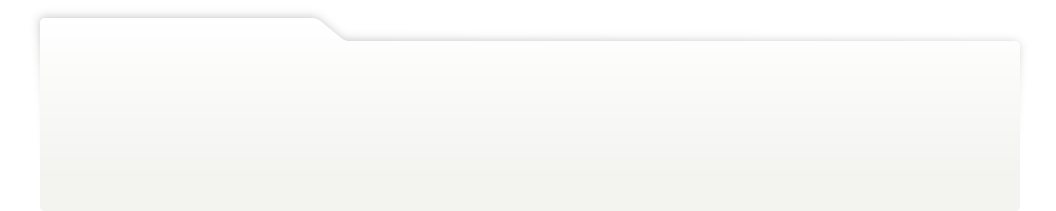
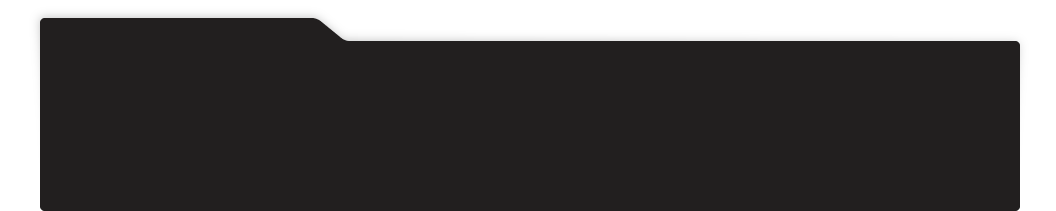
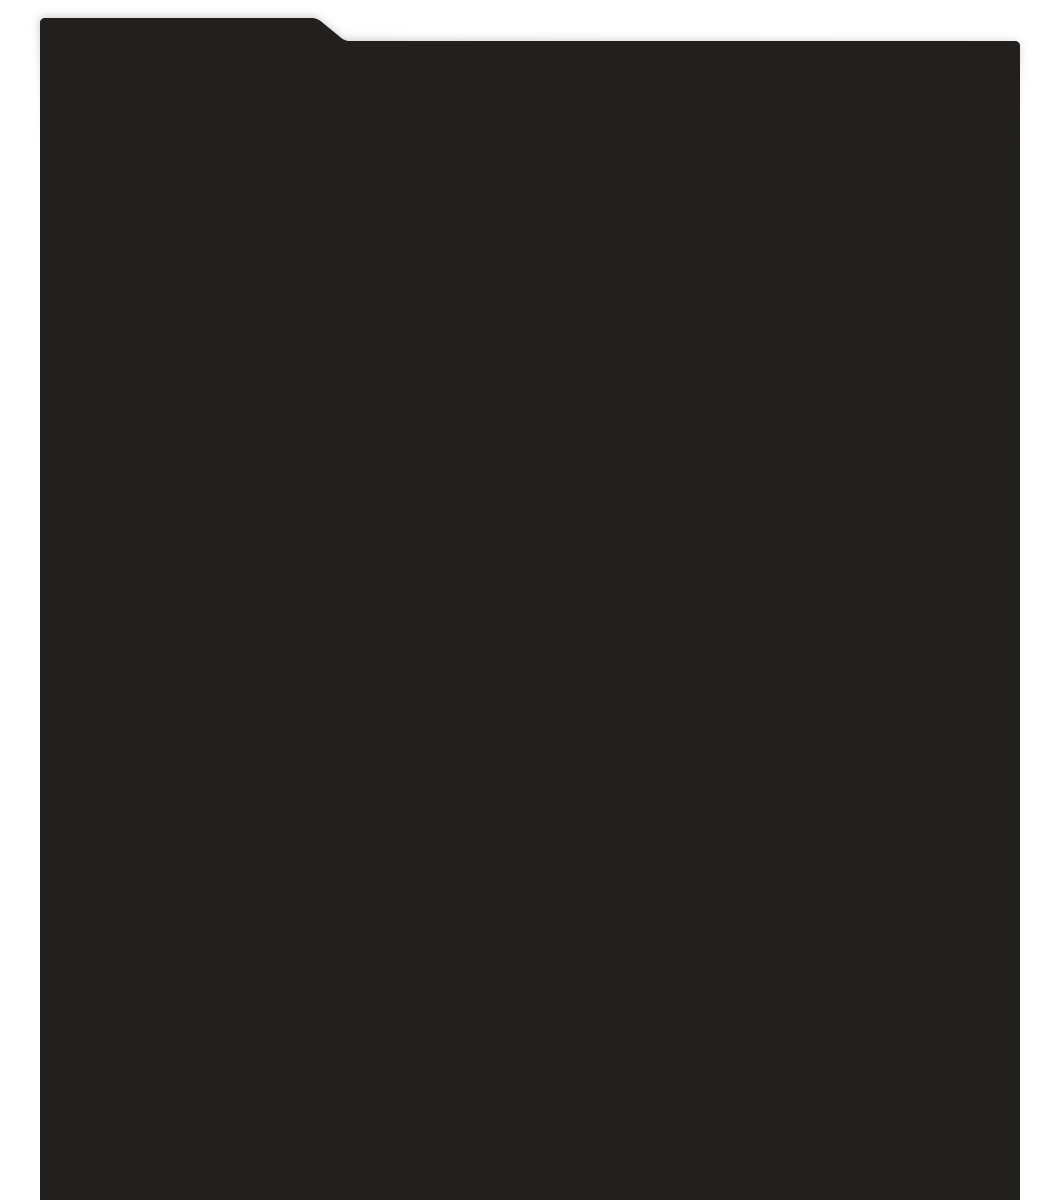
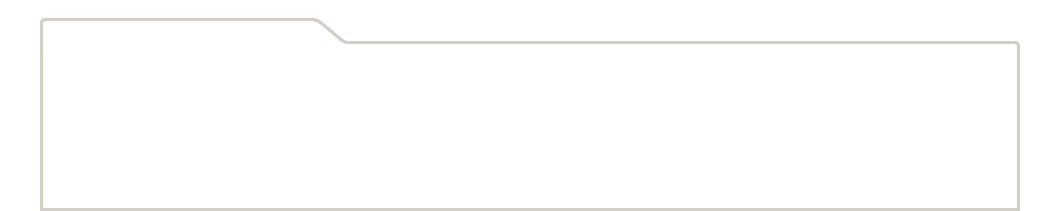
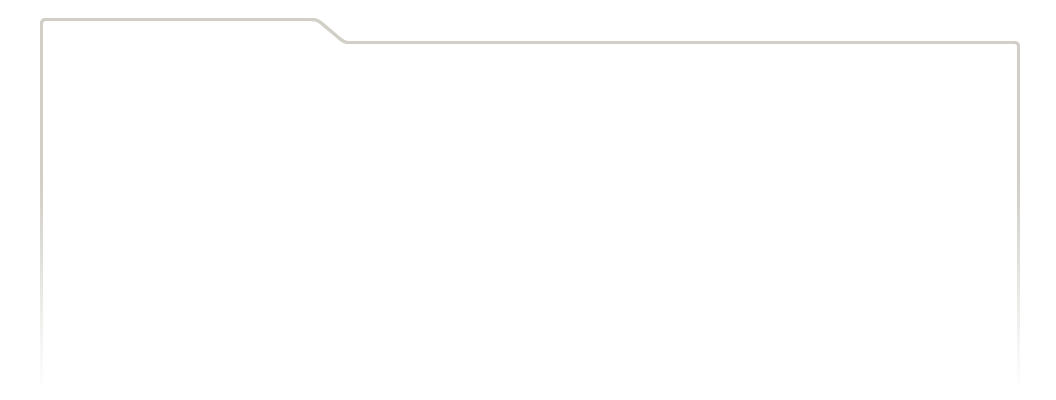
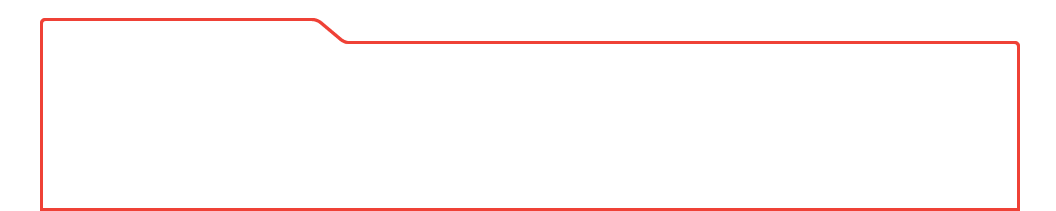
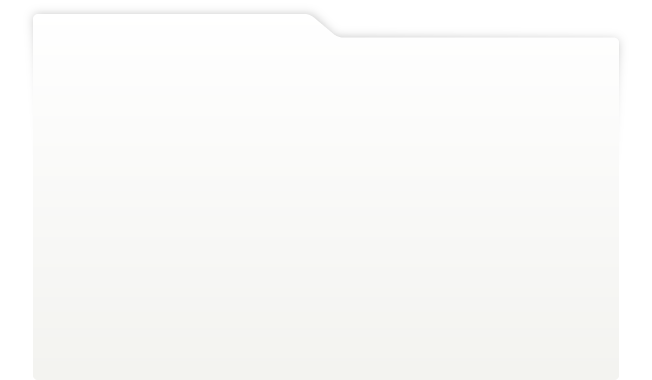
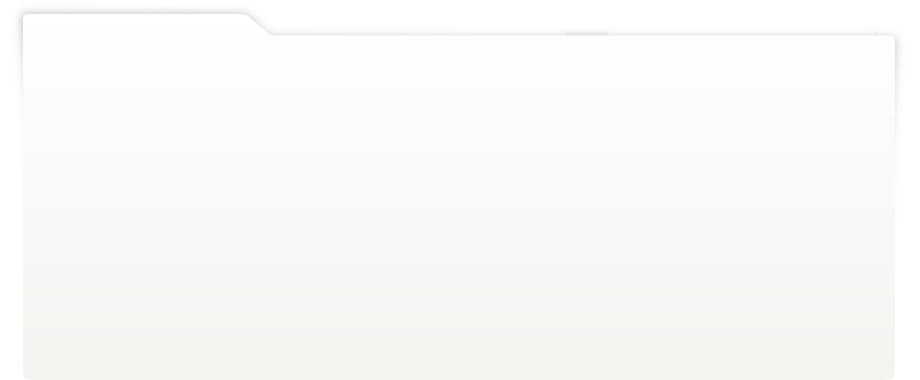
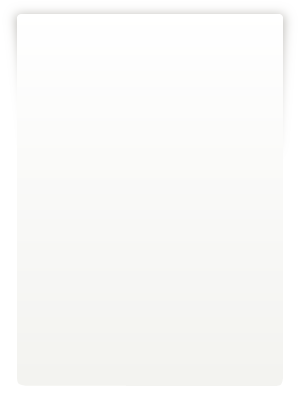
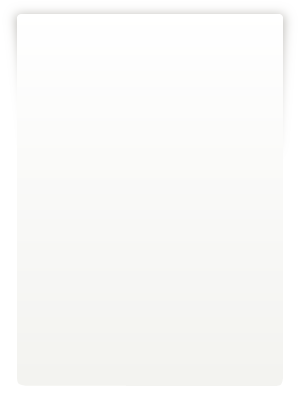
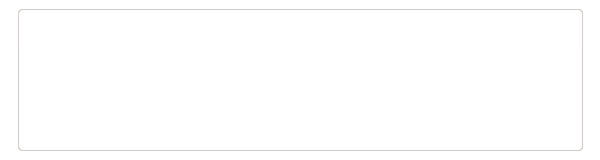
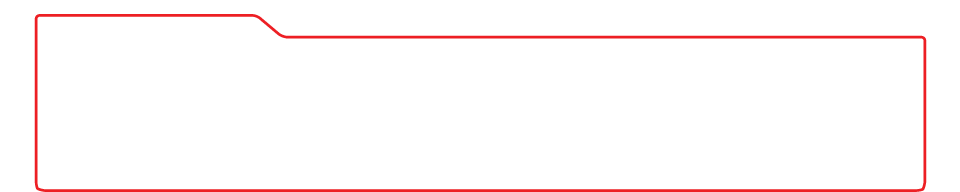
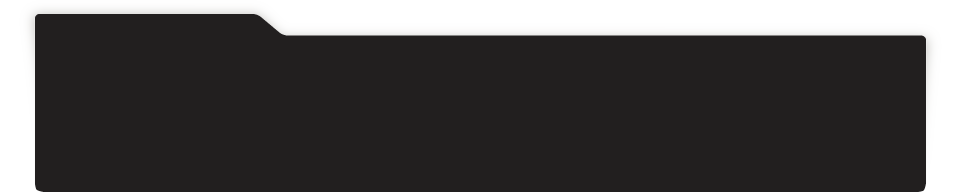
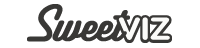
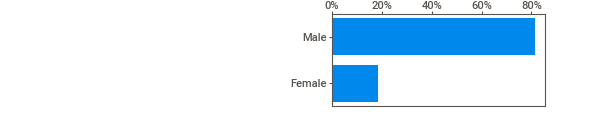
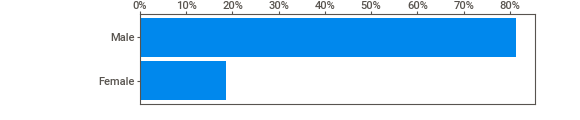
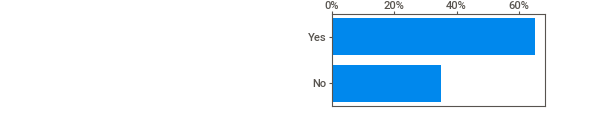
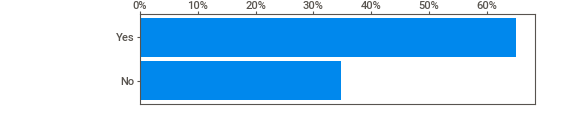
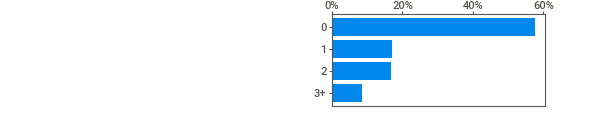
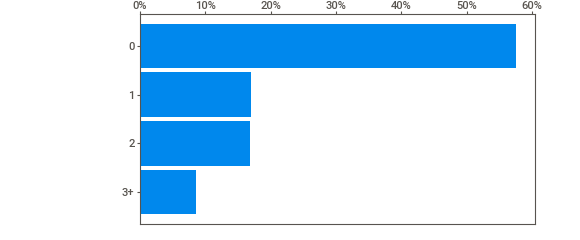
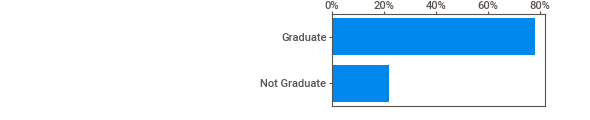
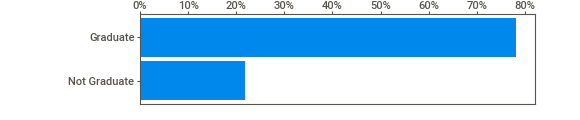
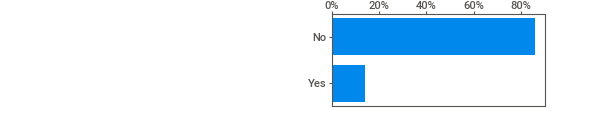
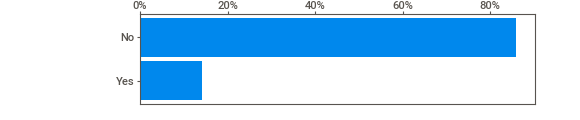
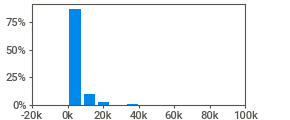
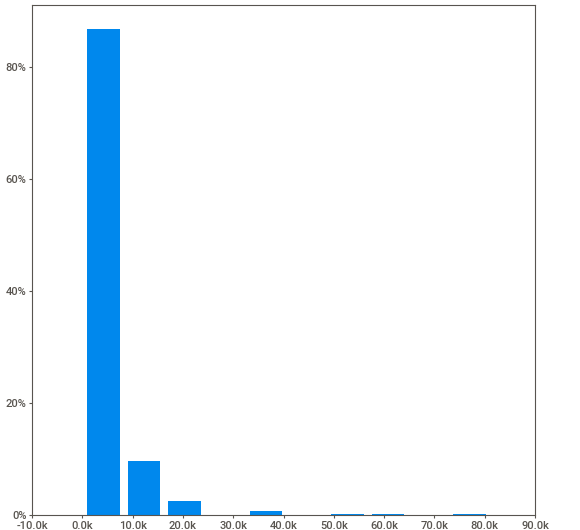
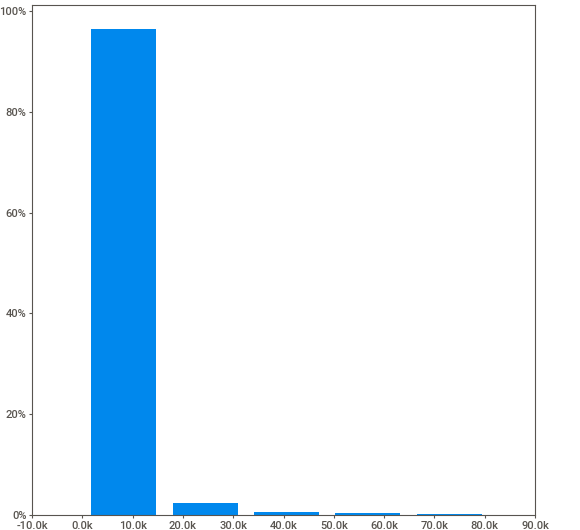
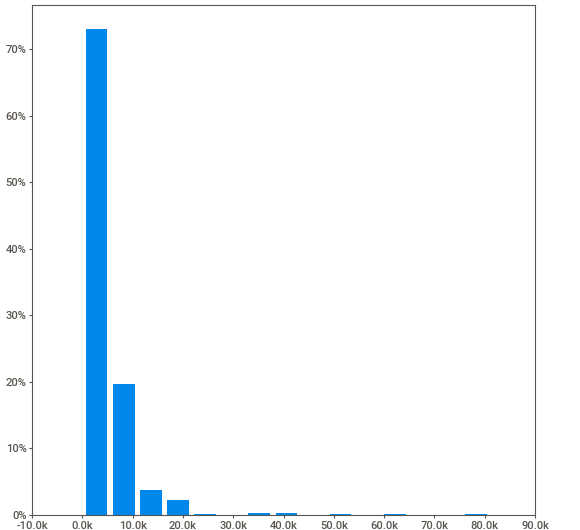
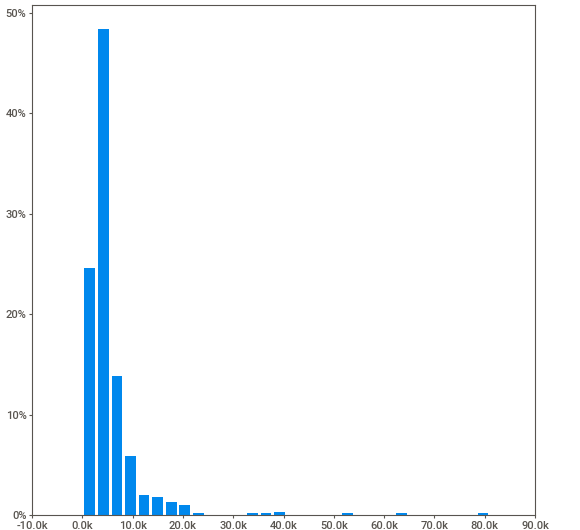
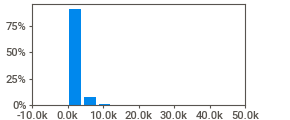
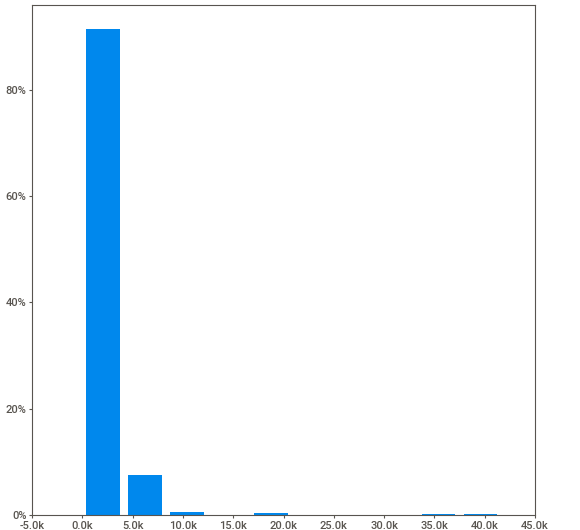
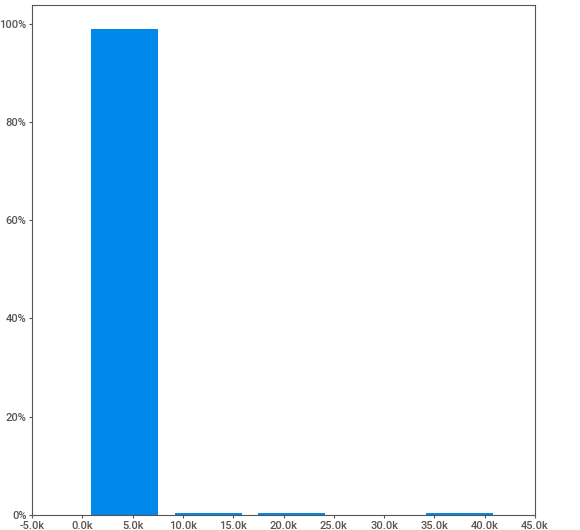
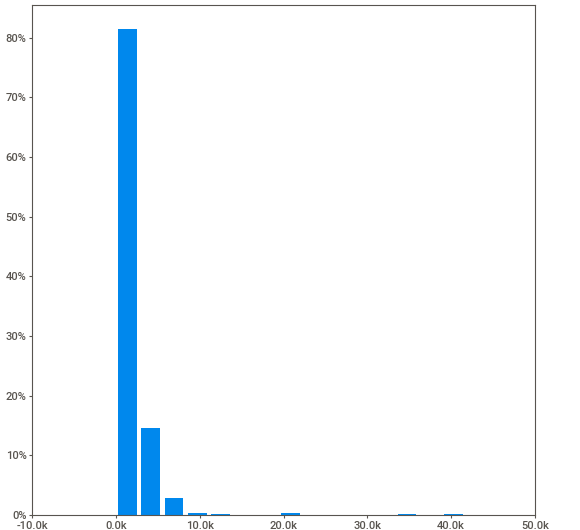
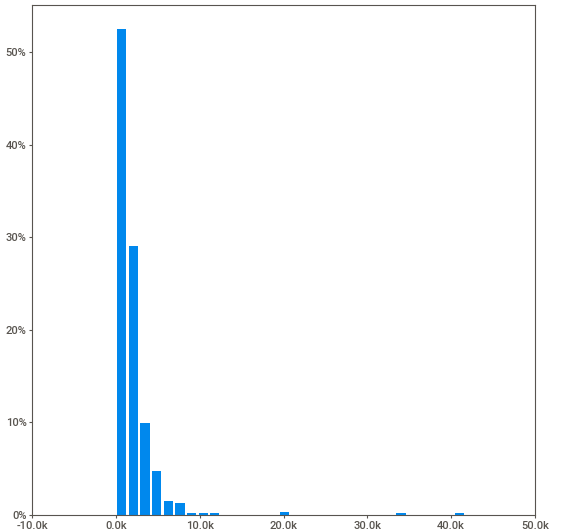
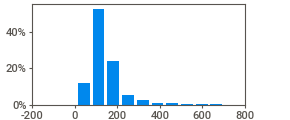
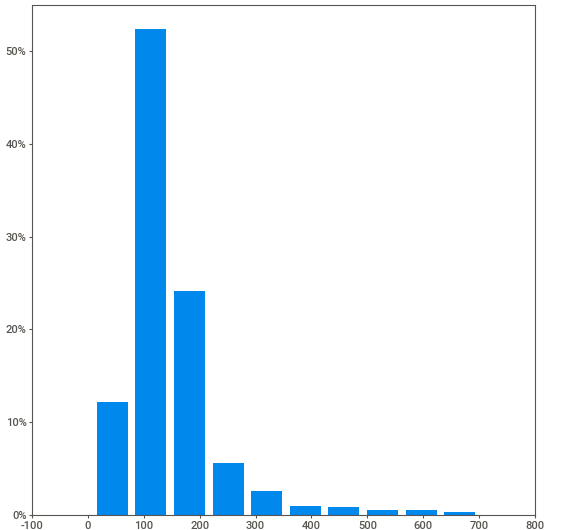
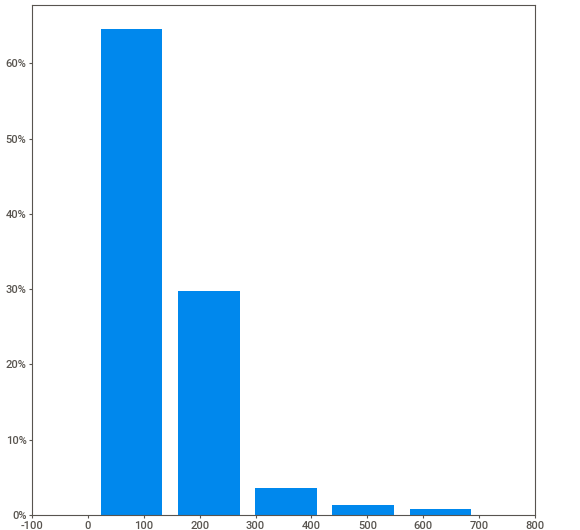
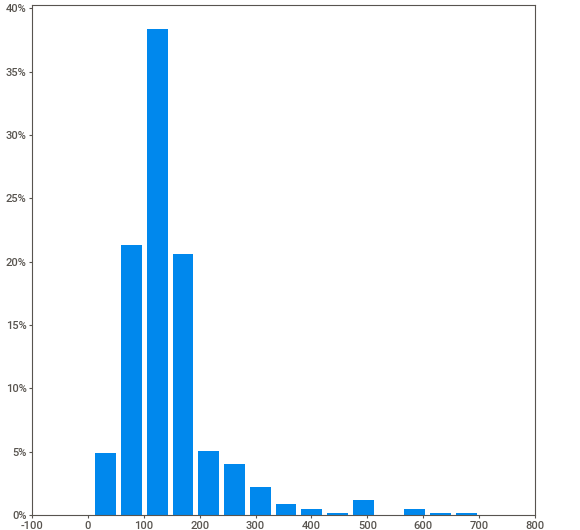
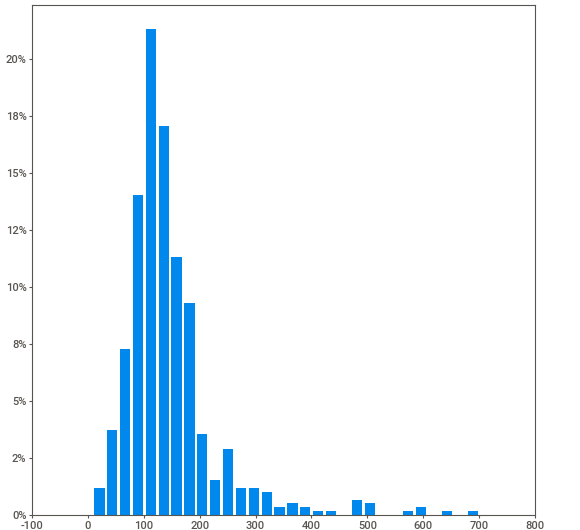
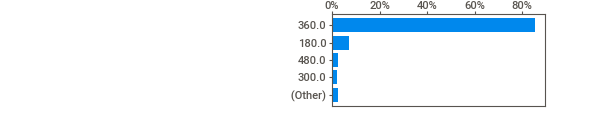
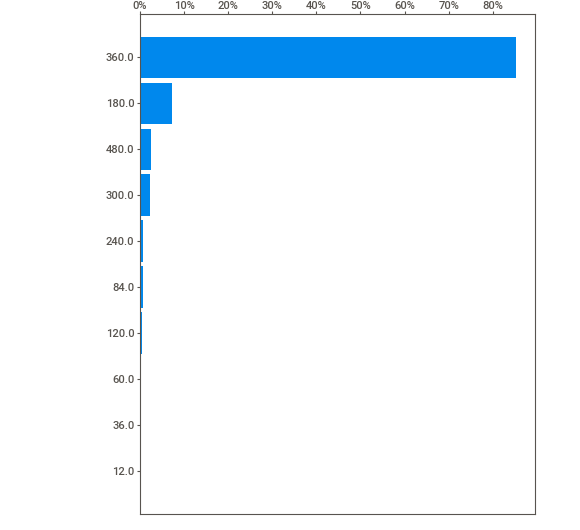
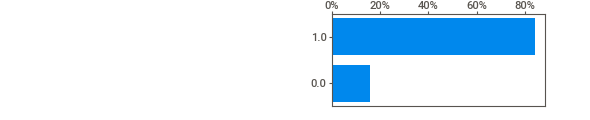
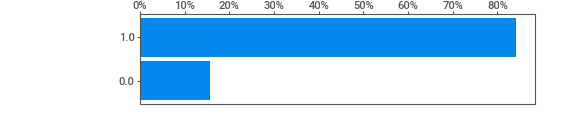
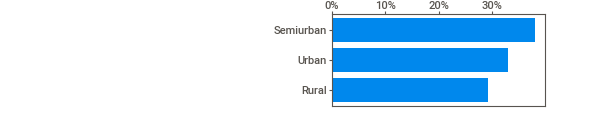
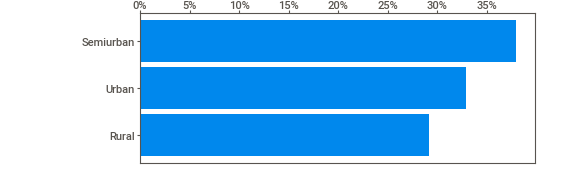
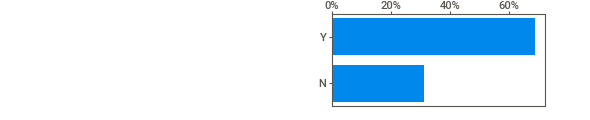
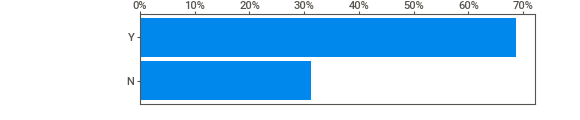
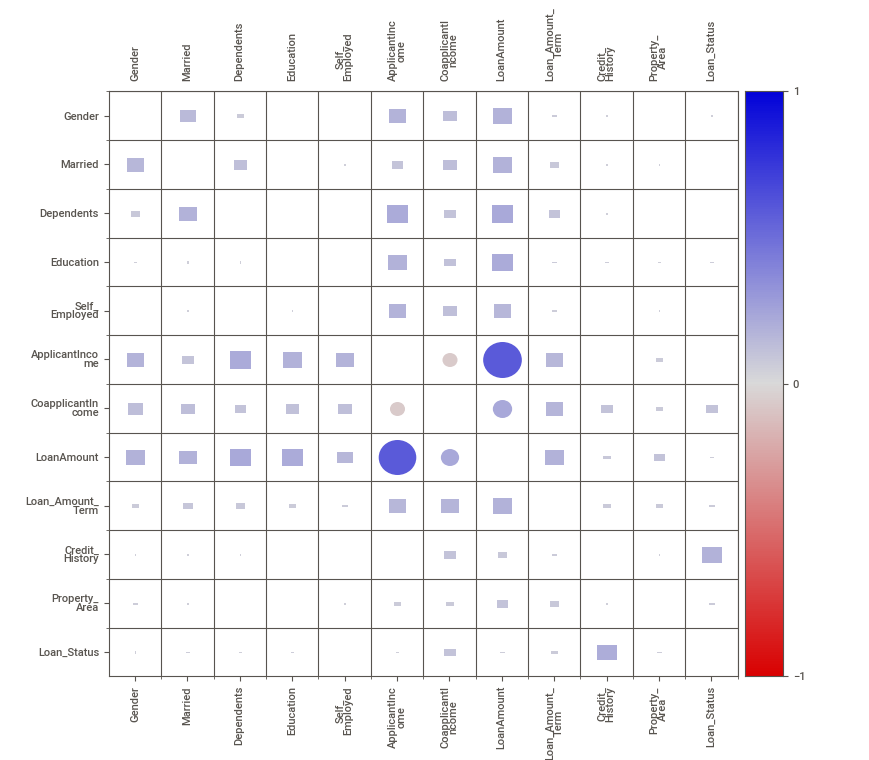
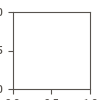

In [8]:
autoEDA = sweetviz.analyze(train_data)
autoEDA.show_notebook()

### Your Own EDA


## Question 1: An overview of the data.
         • the number of records, fields and their data types

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
## overview of the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [11]:
# Statistical view of the train dataset
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [12]:
# Statistical view of the test dataset
test_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,367,367,LP001015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,356,2,Male,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,367,2,Yes,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,357,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,367,2,Graduate,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,344,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,367.0,NaN,NaN,NaN,4805.599455,4910.685399,0.0,2864.0,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,NaN,NaN,NaN,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.0
LoanAmount,362.0,NaN,NaN,NaN,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,NaN,NaN,NaN,342.537396,65.156643,6.0,360.0,360.0,360.0,480.0


## Question 2: What data quality issues exist in both train and test?

In [13]:
## checking duplicate values of the train dataset
train_data.duplicated().sum()

0

In [14]:
## checking duplicate values of the test dataset
test_data.duplicated().sum()

0

In [15]:
## checking null values of train dataset
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
## checking null values of test dataset
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

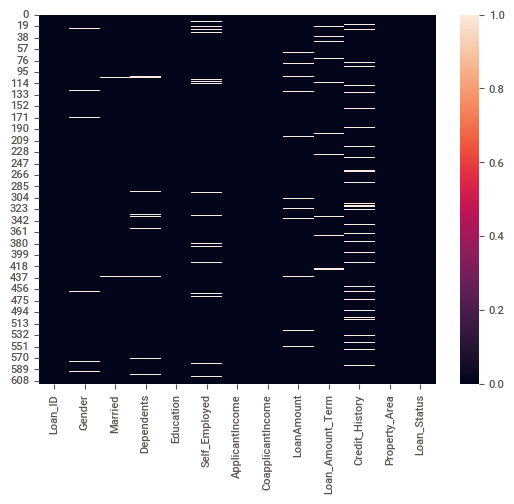

In [17]:
## Vusualising null values of train dataset
sns.heatmap(train_data.isnull())
plt.show()

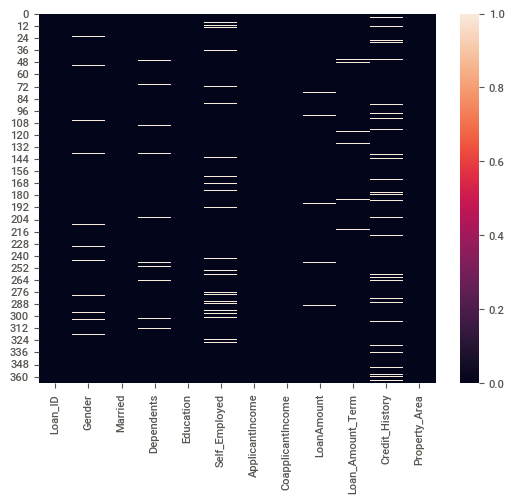

In [18]:
## Visualising null values of test dataset
sns.heatmap(test_data.isnull())
plt.show()

## Question 3: How do the the loan statuses compare? i.e. what is the distrubition of each?

In [19]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 1.0, 'Loan Status Distribution')

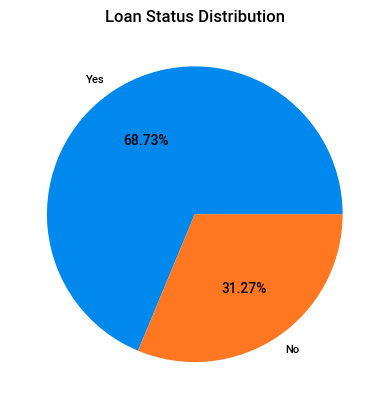

In [20]:
plt.pie(train_data['Loan_Status'].value_counts(), labels=['Yes', 'No'],autopct='%1.2f%%')
plt.title("Loan Status Distribution")

In [21]:
print("------ Normalize Value ------")
train_data["Loan_Status"].value_counts(normalize=True)

------ Normalize Value ------


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## Question 4: How do women and men compare when it comes to defaulting on loans in the historical dataset?

In [22]:
x = train_data.groupby('Gender')['Loan_Status'].value_counts()
x

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

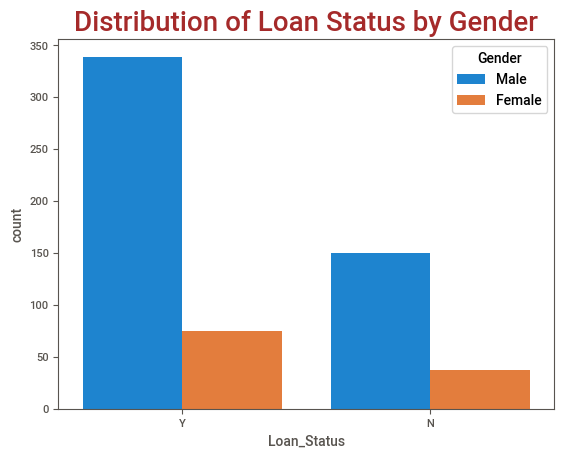

In [23]:
sns.countplot(x="Loan_Status", hue="Gender", data=train_data)
plt.title("Distribution of Loan Status by Gender", fontsize=20, fontweight='bold', color='brown')
plt.show()


In [24]:
print(" ----- Normalize Value of Gender wise Loan Status ----- ")
train_data.groupby('Gender')['Loan_Status'].value_counts(normalize=True)

 ----- Normalize Value of Gender wise Loan Status ----- 


Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: Loan_Status, dtype: float64

## Question 5: How many of the loan applicants have dependents based on the historical dataset?

In [25]:
train_data[train_data['Dependents'] != '0'].shape[0]

269

In [26]:
train_data[train_data["Dependents"] != '0'].shape[0]/train_data.shape[0]


0.4381107491856677

## Question 6: How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

In [27]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
train_data.groupby('Self_Employed')['ApplicantIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Self_Employed,,,,,,,,
No,500.0,5049.748000,5682.895810,150.0,2824.50,3705.5,5292.75,81000.0
Yes,82.0,7380.817073,5883.564795,674.0,3452.25,5809.0,9348.50,39147.0


## Question 7: Are applicants with a credit history more likely to default than those who do not have one?

In [29]:
train_data.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

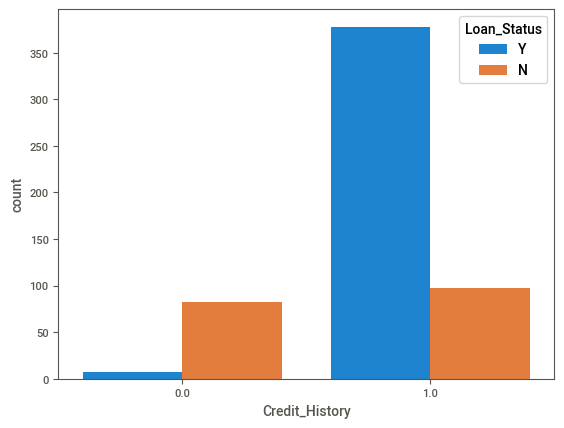

In [30]:
sns.countplot(x="Credit_History", hue="Loan_Status", data=train_data)

In [31]:
train_data.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: Loan_Status, dtype: float64

## Question 8: Is there a correlation between the applicant's income and the loan amount they applied for?

In [32]:
train_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


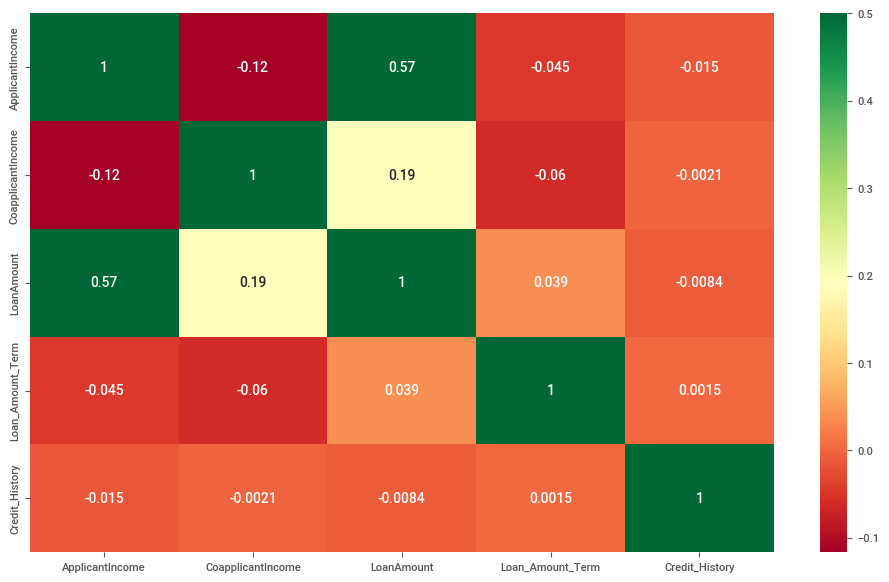

In [33]:
plt.figure(figsize=(12,7))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

## Your anwers:

Q1 - An overview of the data.

- `Train_data` contains `614 rows` and total `13 rows`
- Out of 13 columns there are `4 float` columns, `1 integer` column and `8 objects` columns.

- `Test data` contains `367 columns` and total `13 rows`
- Out of 13 columns there are `3 float` columns,  `2 integer` columns and `7 object` columns.

Q2 - What data quality issues exist in both train and test?

- There are no duplicate values in both train dataset and test dataset.
- But both dataset have some missing values.
- Train dataset: `Gender` 13, `Married` 3, `Dependents` 15, `Self_Employed` 32, `LoanAmount` 22, `Loan_Amount_Term` 14, `Credit_History` 50 have missings values respectively.
- Test Dataset: `Gender 11, Dependents 10, Self_Employed 23, LoanAmount 5, Loan_Amount_Term 6 and Credit_History 29` contains missing values respectively.

Q3 - How do the loan statuses compare? i.e. what is the distrubition of each?

- There are 422 loans with a Yes status, which is the majority, and 192 loans with No status.

Q4 - How do women and men compare when it comes to defaulting on loans in the historical dataset?

- Men have a higher loan status of Yes than women do, and same goes to loan status of No.

Q5 - How many of the loan applicants have dependents based on the historical dataset?

- According to the historical dataset, 269 loan applicants have dependents.

Q6 - How does the income of those who are employed compare to those who are self-employed based on the historical dataset?

- The `average income` of those who are employed is `5049 which is low` compared to self-employed that is `7380`.
- The `minimum income` of those who are employed is `150 which is low` compared to self-employed that is `674`.
- But the `maximum income` of those who are employed is `81000 which is high` compared to self-employed that is `39147`.
- Additionally, `500` people are employed, which is a `large number` when compared to the `82` people who were self-employed in the historical dataset.

Q7 - Are applicants with a credit history more likely to default than those who do not have one?

- Indeed, candidates with credit histories may be more likely to default than those without them.

Q8 - Is there a correlation between the applicant's income and the loan amount they applied for?

- Yes, there is a correlation between the applicant's income and the loan amount they applied for.

# Part Two

## Auto ML wth autosklearn


In [34]:
!pip install auto-sklearn

  Using cached scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.2 which is incompatible.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [35]:
import autosklearn.classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [36]:
import autosklearn

In [37]:
# Matrix of features

X = train_data[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train_data['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [39]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7804878048780488


In [40]:
print(confusion_matrix(predictions_autoML, y_test))

[[18  2]
 [25 78]]


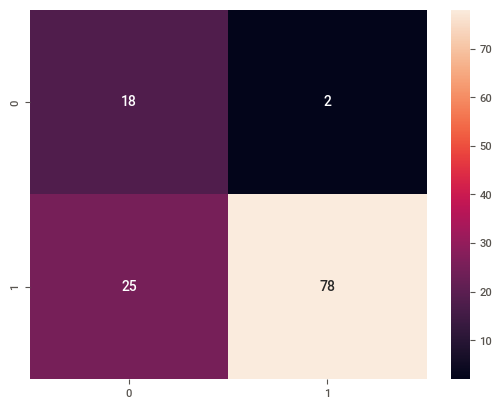

In [41]:
con_mat = confusion_matrix(predictions_autoML, y_test)

sns.heatmap(con_mat, annot=True)
plt.show()

## Bespoke ML sklearn

### Data Preparation

In [42]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [43]:
# Matrix of features

df = train_data[['Gender',
'Married',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History']]


# imputing the missing values:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

# encoding categorical features
df['Gender'] = df['Gender'].map({'Male':0,'Female':1}).astype(int)
df['Married'] = df['Married'].map({'No':0,'Yes':1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)


df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)

X = df.copy()

# label encode target
y = train_data['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [47]:
# train
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [48]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.7804878048780488


In [49]:
print(classification_report(predictions_clf, y_test))

              precision    recall  f1-score   support

           0       0.44      0.86      0.58        22
           1       0.96      0.76      0.85       101

    accuracy                           0.78       123
   macro avg       0.70      0.81      0.72       123
weighted avg       0.87      0.78      0.80       123



In [50]:
print(confusion_matrix(predictions_clf, y_test))

[[19  3]
 [24 77]]


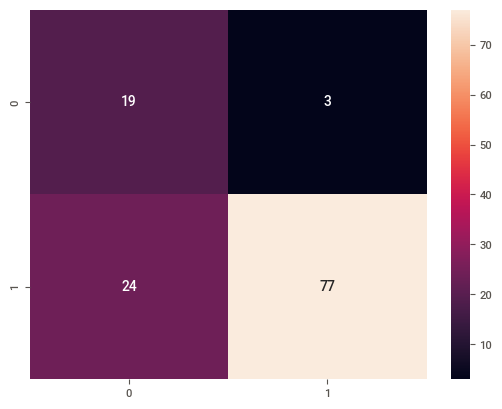

In [51]:
cm = confusion_matrix(predictions_clf, y_test)
sns.heatmap(cm, annot=True)
plt.show()

# ROC_AUC

In [52]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(predictions_clf, y_test)
print("AUC score is ",auc)

AUC score is  0.8130063006300631


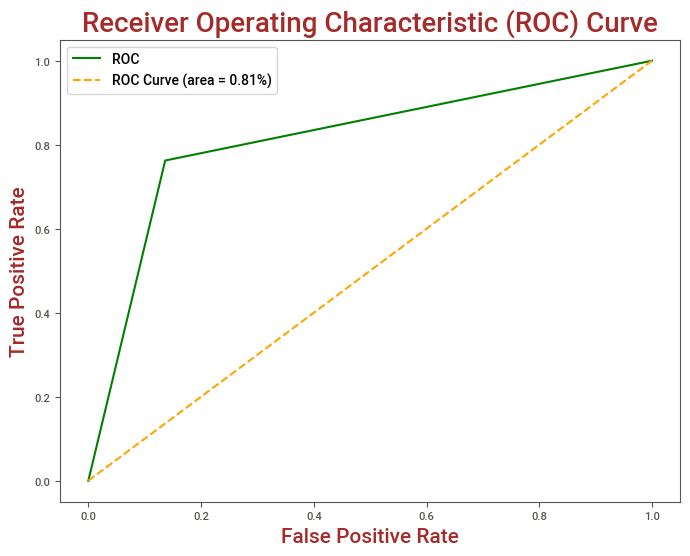

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(predictions_clf, y_test)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0,1], [0,1], color='orange', linestyle='--', label='ROC Curve (area = %0.2f%%)' % auc)

plt.xlabel("False Positive Rate", fontsize=15, fontweight="bold", color="brown")
plt.ylabel("True Positive Rate", fontsize=15, fontweight="bold", color="brown")
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=20, fontweight="bold", color="brown")
plt.legend()

plt.show()

# K-Fold Cross Validation


In [54]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv= 5, scoring='accuracy')
print("Cross - Validation score: {}".format(scores))


Cross - Validation score: [0.81818182 0.76530612 0.73469388 0.78571429 0.81632653]


We can summarize the cross-validation accuracy by calculating its mean.

In [55]:
# compute Average Cross-Validation score
print("Average cross-validation score: {:.4f}".format(scores.mean()))

Average cross-validation score: 0.7840
